# Итоговая работа.

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.stats import norm
%matplotlib inline

## Задание 1
Вычислите производную функции:  
$tg^2(sin(x) + cos(2x+3))$  
в точке $x_0=1$

In [2]:
import sympy as sym

In [3]:
x = sym.Symbol('x')

In [5]:
F1 = sym.tan(sym.sin(x) + sym.cos(2 * x + 3))**2
F1

tan(sin(x) + cos(2*x + 3))**2

- Производная функции $F_1$

In [6]:
res1 = sym.diff(F1, x)
res1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

- Значение производной в точке $x_0 = 1$

In [7]:
res1 = res1.evalf(subs={'x': 1})
res1

55.3859176353379

## Задание 2
Дана объект в $2D$ пространстве

(-200.0, 200.0)

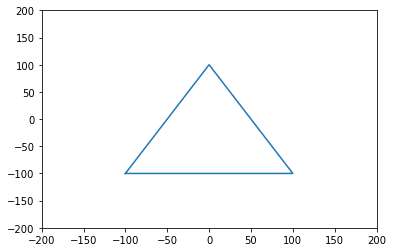

In [28]:
A = [
    [-100, -100, 1], 
    [0, 100, 1], 
    [100, -100, 1], 
    [-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

1) Изменение масштабирования объекта

(-250.0, 250.0)

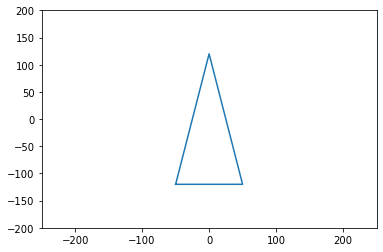

In [29]:
plt.plot(x * 0.5, y * 1.2)
plt.ylim([-200, 200])
plt.xlim([-250, 250]) 

2) Смещение масштабированного объекта

(-100.0, 450.0)

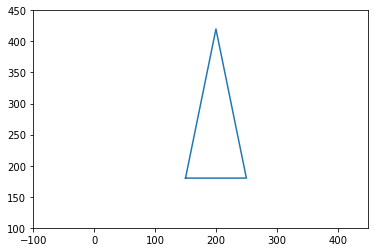

In [30]:
plt.plot((x * 0.5) + 200, (y * 1.2) + 300)
plt.ylim([100, 450])
plt.xlim([-100, 450]) 

## Задание 3
Найдите собственные значения и собственные вектора матрицы:

In [17]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [21]:
vect, val = np.linalg.eig(m)

In [22]:
val

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [23]:
vect

array([ 3., -1.])

# Задание 4
Дана функция с неизвестными параметрами a и b, вам также известны значения функции $fx$ в точках $x$.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку $error$.

In [31]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x     

In [32]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

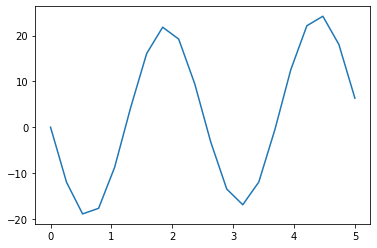

In [33]:
plt.plot(x, fx)
plt.show()

In [27]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [66]:
result_m = minimize(error, [0, 0],  method='COBYLA')

In [71]:
print(f'Оптимальные параметры:\n{result_m}')

Оптимальные параметры:
     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])


# Задание 5
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [40]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [97]:
users = []
test = 1000

In [100]:
for i in range(len(raitings), 0, -1):
    user = raitings[i - 1]
    for j in range(i-1):
        a_len = np.linalg.norm(raitings[j])
        b_len = np.linalg.norm(user)
        f = np.arccos(np.dot(raitings[j], user) / (a_len * b_len)) * 360 / 2 / np.pi
        
        if f < test:
            test = f
            users = [raitings[j], user]

print(f'Наиболее похожие пользователи:\n{users[0]}\n{users[1]}')

Наиболее похожие пользователи:
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
